In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125-2025/mse-125-2025-public/refs/heads/main/data/father_son.tsv", sep="\t")
data

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


<Axes: xlabel='Height', ylabel='Person'>

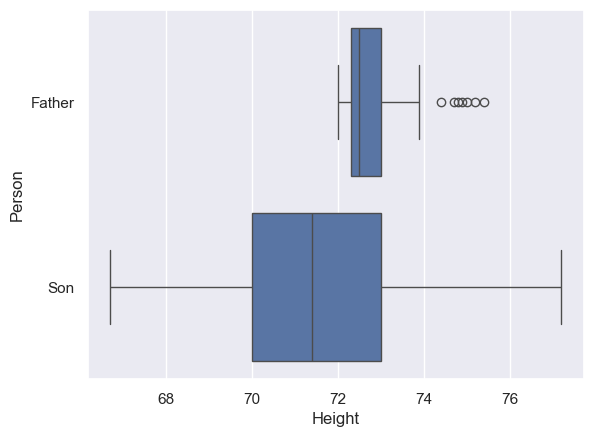

In [11]:
tall_data = data[data["Father"] >= 72]
tall_data = tall_data.melt(value_vars=["Father", "Son"], var_name="Person", value_name="Height")
sns.boxplot(x="Height", y="Person", data=tall_data, orient="h")

<Axes: xlabel='Height', ylabel='Person'>

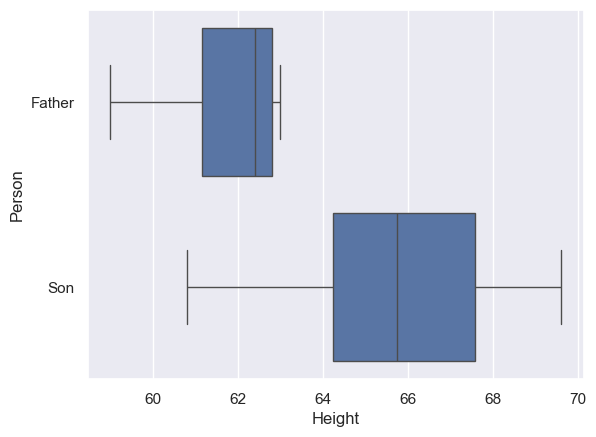

In [12]:
short_data = data[data["Father"] <= 63]
short_data = short_data.melt(value_vars=["Father", "Son"], var_name="Person", value_name="Height")
sns.boxplot(x="Height", y="Person", data=short_data, orient="h")

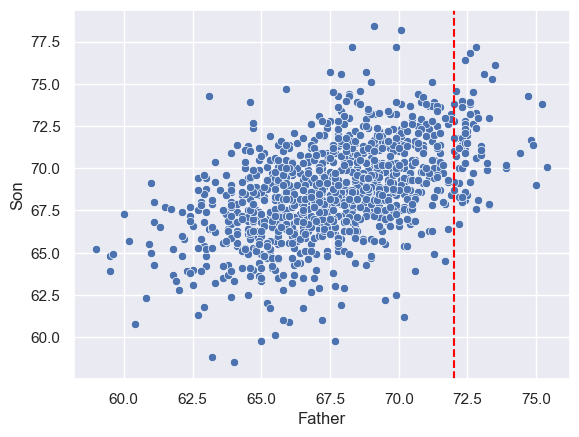

In [13]:
sns.scatterplot(data=data, x="Father", y="Son")
plt.axvline(72, color="red", linestyle="--")

<Axes: xlabel='Father', ylabel='Son'>

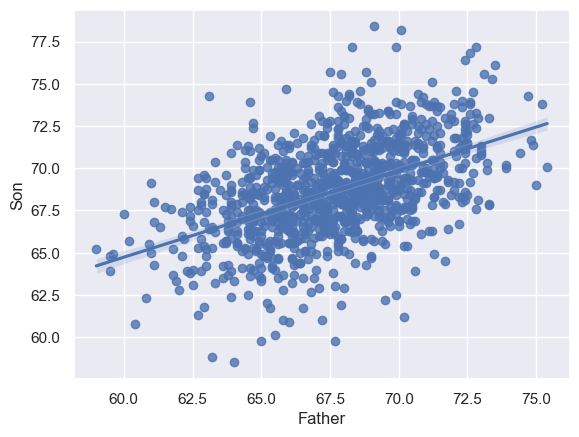

In [9]:
sns.regplot(data=data, x="Father", y="Son")

### Regression Formulas

The cleanest way to fit a linear regression model in Python is to use the formula API from the statsmodels package.

In [3]:
from statsmodels.formula.api import ols

To fit a simple linear regression model, we pass to the `ols` function a pandas dataframe along with a "formula" that describes the regression model that we want to fit. A formula is a string that looks like `"response_column ~ feature_columns"`. We then use the `.fit()` function to "fit" the model, which means finding the optimal coefficients. Lastly, we use the `.summary()` function to summarize the results of our fitted linear model.

In [7]:
model = ols("Son ~ Father", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Son   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     360.9
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.27e-69
Time:                        14:21:13   Log-Likelihood:                -2489.4
No. Observations:                1078   AIC:                             4983.
Df Residuals:                    1076   BIC:                             4993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.8928      1.833     18.491      0.000      30.296      37.489
Father         0.5140      0.027     18.997      0.000       0.461       0.567
==============================================================================
Omnibus:                       17.527   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.642
Skew:                          -0.052   Prob(JB):                     2.22e-07
Kurtosis:                       3.819   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

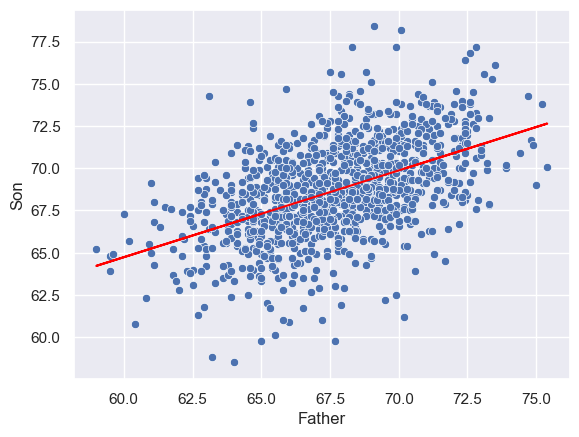

In [16]:
sns.scatterplot(data=data, x="Father", y="Son")
plt.plot(data["Father"], model.predict(), color="red", label="OLS Fit")

In [10]:
# Verify that we get the same coefficients if we compute them manually
beta_1 = np.cov(data["Father"], data["Son"])[0, 1] / np.var(data["Father"])
beta_0 = np.mean(data["Son"]) - beta_1 * np.mean(data["Father"])
print(f"beta_0: {beta_0}, beta_1: {beta_1}")

beta_0: 33.86049652068489, beta_1: 0.5144831696603053


In [12]:
# Get the model predictions and compute mean squared error
predictions = model.predict(data)
mse = np.mean((data["Son"] - predictions) ** 2)
print(f"MSE: {mse}")

MSE: 5.933470496211079


In [17]:
# Verify that these coefficients minimize the MSE
def mse(beta_0, beta_1):
    predictions = beta_0 + beta_1 * data["Father"]
    return np.mean((data["Son"] - predictions) ** 2)

# Create a grid of beta_0 and beta_1 values
beta_0_values = np.linspace(0, 50, 100)
beta_1_values = np.linspace(0, 1, 100)
beta_0_grid, beta_1_grid = np.meshgrid(beta_0_values, beta_1_values)

# Compute the MSE for each combination of beta_0 and beta_1
mse_grid = np.zeros(beta_0_grid.shape)
for i in range(beta_0_grid.shape[0]):
    for j in range(beta_0_grid.shape[1]):
        mse_grid[i, j] = mse(beta_0_grid[i, j], beta_1_grid[i, j])
        

results = pd.DataFrame({
    "beta_0": beta_0_grid.flatten(),
    "beta_1": beta_1_grid.flatten(),
    "mse": mse_grid.flatten()
})
results.sort_values("mse").head(20)

,beta_0,beta_1,mse
5167,33.838384,0.515152,5.934015
4871,35.858586,0.484848,5.939935
5463,31.818182,0.545455,5.943841
5364,32.323232,0.535354,5.952432
5068,34.343434,0.505051,5.958264
4575,37.878788,0.454545,5.961600
5660,30.303030,0.565657,5.962346
4970,35.353535,0.494949,5.965401
5759,29.797980,0.575758,5.969411
4674,37.373737,0.464646,5.971409


## Regression Coefficient Sampling Distribution

In [5]:
n_bootstrap_samples = 1000
boot_coefs = []

for _ in range(n_bootstrap_samples):
    # Sample with replacement
    sample = data.sample(frac=1, replace=True)
    
    # Fit the model
    model = ols("Son ~ Father", data=sample).fit()
    
    # Store the coefficients
    boot_coefs.append(list(model.params))
    
boot_coefs = pd.DataFrame(boot_coefs, columns=["Intercept", "Slope"])
boot_coefs

,Intercept,Slope
0,34.077603,0.513388
1,34.440533,0.505050
2,34.014976,0.511803
3,37.257601,0.465642
4,34.021076,0.513993
...,...,...
995,31.838206,0.544319
996,33.389035,0.520630
997,35.203951,0.492549
998,33.713409,0.517097


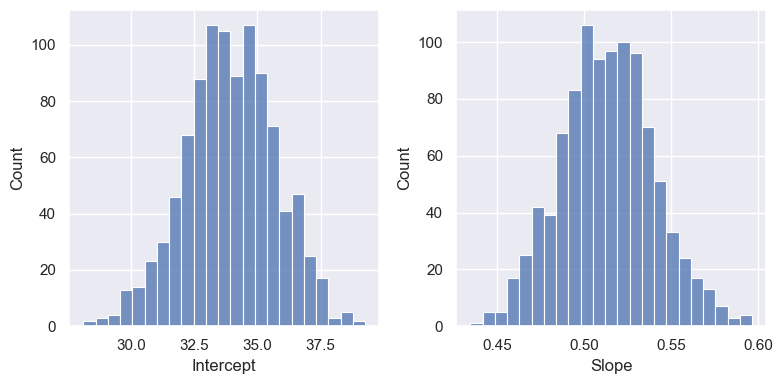

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(data=boot_coefs, x="Intercept", ax=axes[0])
sns.histplot(data=boot_coefs, x="Slope", ax=axes[1])

plt.tight_layout()

In [12]:
point_estimates.values

array([33.89280054,  0.51400591])

In [14]:
# Confidence intervals
boot_ses = boot_coefs.std().values

point_estimates = ols("Son ~ Father", data=data).fit().params.values
z_stat = stats.norm.ppf(0.975)

print(f"Intercept: ({point_estimates[0] - z_stat * boot_ses[0]}, {point_estimates[0] + z_stat * boot_ses[0]})")
print(f"Slope: ({point_estimates[1] - z_stat * boot_ses[1]}, {point_estimates[1] + z_stat * boot_ses[1]})")


Intercept: (30.325798619215472, 37.45980246210795)
Slope: (0.4614294783386247, 0.5665823467525585)


In [ ]:
# P-values for hypothesis that the coefficients are equal to 0
print(f"Intercept: {2 * (stats.norm.cdf(-1 * np.abs(point_estimates[0] / boot_ses[0])))}")
print(f"Slope: {2 * (stats.norm.cdf(-1 * np.abs(point_estimates[1] / boot_ses[1])))}")

Intercept: 2.0873297476647116e-77
Slope: 7.789595737302051e-82
